Your Friend has developed the Product and he wants to establish the product startup and he is searching for a perfect location where getting the investment has a high chance. But due to its financial restriction, he can choose only between three locations -  Bangalore, Mumbai, and NCR. As a friend, you want to help your friend deciding the location. NCR include Gurgaon, Noida and New Delhi. Find the location where the most number of funding is done. That means, find the location where startups has received funding maximum number of times. Plot the bar graph between location and number of funding. Take city name "Delhi" as "New Delhi". Check the case-sensitiveness of cities also. That means, at some place instead of "Bangalore", "bangalore" is given. Take city name as "Bangalore". For few startups multiple locations are given, one Indian and one Foreign. Consider the startup if any one of the city lies in given locations.

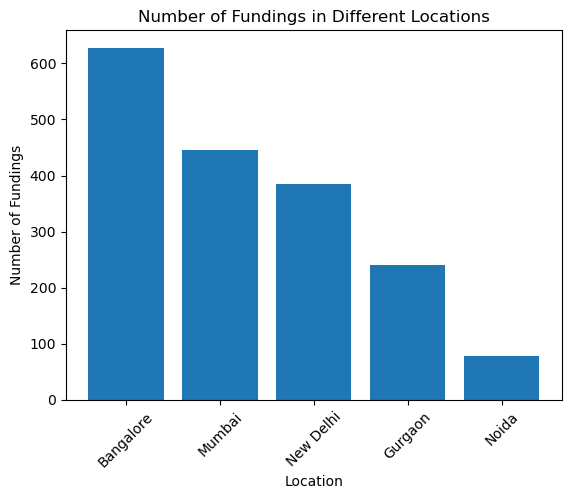

Bangalore 628
Mumbai 446
New Delhi 385
Gurgaon 240
Noida 78


C:\Users\ABHIJIT\AppData\Local\Temp\ipykernel_21284\3972408498.py:25: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for location, count in city_counts.iteritems():


In [4]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("C:\\Users\\ABHIJIT\\OneDrive\\Documents\\startup_funding.csv")

# Correct city names
data['CityLocation'].replace("Delhi", "New Delhi", inplace=True)
data['CityLocation'].replace("bangalore", "Bangalore", inplace=True)

# Filter data for the specified cities
filtered_data = data[data['CityLocation'].isin(['Bangalore', 'Mumbai', 'New Delhi', 'Gurgaon', 'Noida'])]

# Count the number of fundings for each city
city_counts = filtered_data['CityLocation'].value_counts()

# Plot the bar graph
plt.bar(city_counts.index, city_counts.values)
plt.xlabel('Location')
plt.ylabel('Number of Fundings')
plt.title('Number of Fundings in Different Locations')
plt.xticks(rotation=45)
plt.show()

# Print the location and corresponding number of fundings
for location, count in city_counts.iteritems():
    print(location, count)

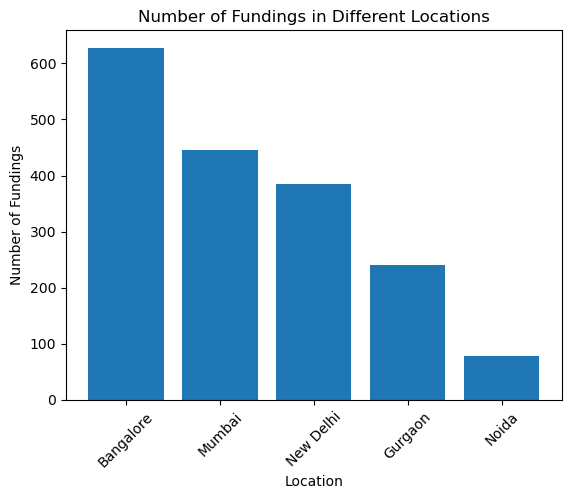

Bangalore 628
Mumbai 446
New Delhi 385
Gurgaon 240
Noida 78


C:\Users\ABHIJIT\AppData\Local\Temp\ipykernel_21284\2342755130.py:45: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for location, count in city_counts.iteritems():


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

# Read the CSV data into a Pandas DataFrame
data = pd.read_csv('C:\\Users\\ABHIJIT\\OneDrive\\Documents\\startup_funding.csv')

# Correct city names
data['CityLocation'].replace("Delhi", "New Delhi", inplace=True)
data['CityLocation'].replace("bangalore", "Bangalore", inplace=True)

# Connect to a SQLite database
conn = sqlite3.connect('startup_data.db')

# Load the DataFrame into the database
data.to_sql('startup', conn, if_exists='replace', index=False)

# Write an SQL query to filter data for the specified cities
query = """
SELECT CityLocation
FROM startup
WHERE CityLocation IN ('Bangalore', 'Mumbai', 'New Delhi', 'Gurgaon', 'Noida')
"""

# Execute the query and load the result into a Pandas DataFrame
filtered_data = pd.read_sql_query(query, conn)

# Close the database connection
conn.close()

# Count the number of fundings for each city
city_counts = filtered_data['CityLocation'].value_counts()

# Plot the bar graph
plt.bar(city_counts.index, city_counts.values)
plt.xlabel('Location')
plt.ylabel('Number of Fundings')
plt.title('Number of Fundings in Different Locations')
plt.xticks(rotation=45)

# Display the bar graph
plt.show()

# Print the location and corresponding number of fundings
for location, count in city_counts.iteritems():
    print(location, count)


Even after trying for so many times, your friend’s startup could not find the investment. So you decided to take this matter in your hand and try to find the list of investors who probably can invest in your friend’s startup. Your list will increase the chance of your friend startup getting some initial investment by contacting these investors. Find the top 5 investors who have invested maximum number of times (consider repeat investments in one company also). In a startup, multiple investors might have invested. So consider each investor for that startup. Ignore undisclosed investors.

In [7]:
import pandas as pd
import numpy as np

# Read the CSV file
df = pd.read_csv('C:\\Users\\ABHIJIT\\OneDrive\\Documents\\startup_funding.csv', encoding='utf-8')

# Replace missing investor names with an empty string
df['InvestorsName'].fillna("", inplace=True)

# Split investor names for each startup and create a list of individual investors
investor_list = []
for investors in df['InvestorsName']:
    if investors != "":
        individual_investors = investors.split(",")
        for investor in individual_investors:
            investor_list.append(investor.strip())

# Count the number of investments for each investor
investor_counts = pd.Series(investor_list).value_counts()

# Print the top 5 investors who have invested the maximum number of times
top_investors = investor_counts.head(5)
for investor, count in top_investors.items():
    print(investor, count)

Sequoia Capital 64
Accel Partners 53
Kalaari Capital 44
SAIF Partners 41
Indian Angel Network 40


After re-analysing the dataset you found out that some investors have invested in the same startup at different number of funding rounds. So before finalising the previous list, you want to improvise it by finding the top 5 investors who have invested in different number of startups. This list will be more helpful than your previous list in finding the investment for your friend startup. Find the top 5 investors who have invested maximum number of times in different companies. That means, if one investor has invested multiple times in one startup, count one for that company. There are many errors in startup names. Ignore correcting all, just handle the important ones - Ola, Flipkart, Oyo and Paytm

In [8]:
import pandas as pd

# Read the CSV file
data = pd.read_csv('C:\\Users\\ABHIJIT\\OneDrive\\Documents\\startup_funding.csv')

# Correct startup names
data['StartupName'].replace(["Oyo Rooms", "OyoRooms", "Oyorooms", "OYO Rooms"], 'Oyo', inplace=True)
data['StartupName'].replace(["Ola Cabs", "Olacabs"], 'Ola', inplace=True)
data['StartupName'].replace("Flipkart.com", 'Flipkart', inplace=True)
data['StartupName'].replace("Paytm Marketplace", 'Paytm', inplace=True)


# Clean up investors' data
data['InvestorsName'].fillna("", inplace=True)
data['InvestorsName'] = data['InvestorsName'].apply(lambda x: x.split(",") if x != "" else [])

# Create a dictionary to count unique investors per startup
investor_counts = {}

for investors, startup in zip(data['InvestorsName'], data['StartupName']):
    unique_investors = set([investor.strip() for investor in investors if investor.strip() != ""])
    if startup in investor_counts:
        investor_counts[startup].update(unique_investors)
    else:
        investor_counts[startup] = unique_investors

# Count the number of unique investors per startup
investor_counts_unique = {startup: len(investors) for startup, investors in investor_counts.items()}

# Create a dictionary to count the number of startups each investor has invested in
investor_investments = {}

for investors in investor_counts.values():
    for investor in investors:
        if investor in investor_investments:
            investor_investments[investor] += 1
        else:
            investor_investments[investor] = 1

# Sort the investors based on the number of startups invested in
sorted_investors = sorted(investor_investments.items(), key=lambda x: x[1], reverse=True)

# Print the top 5 investors with the maximum number of startups invested in
for investor, count in sorted_investors[:5]:
    print(investor, count)

Sequoia Capital 48
Accel Partners 47
Kalaari Capital 41
Indian Angel Network 40
Blume Ventures 36


Even after putting so much effort in finding the probable investors, it didn't turn out to be helpful for your friend. So you went to your investor friend to understand the situation better and your investor friend explained to you about the different Investment Types and their features. This new information will be helpful in finding the right investor. Since your friend startup is at an early stage startup, the best-suited investment type would be - Seed Funding and Crowdfunding. Find the top 5 investors who have invested in a different number of startups and their investment type is Crowdfunding or Seed Funding. Correct spelling of investment types are - "Private Equity", "Seed Funding", "Debt Funding", and "Crowd Funding". Keep an eye for any spelling mistake. You can find this by printing unique values from this column. There are many errors in startup names. Ignore correcting all, just handle the important ones - Ola, Flipkart, Oyo and Paytm.

In [9]:
import pandas as pd

# Read the CSV file
data = pd.read_csv('C:\\Users\\ABHIJIT\\OneDrive\\Documents\\startup_funding.csv')

# Correct startup names
data['StartupName'].replace(["Oyo Rooms", "OyoRooms", "Oyorooms", "OYO Rooms"], 'Oyo', inplace=True)
data['StartupName'].replace(["Ola Cabs", "Olacabs"], 'Ola', inplace=True)
data['StartupName'].replace("Flipkart.com", 'Flipkart', inplace=True)
data['StartupName'].replace("Paytm Marketplace", 'Paytm', inplace=True)

# Correct investment type spellings
data['InvestmentType'].replace("PrivateEquity", 'Private Equity', inplace=True)
data['InvestmentType'].replace("SeedFunding", 'Seed Funding', inplace=True)
data['InvestmentType'].replace("DebtFunding", 'Debt Funding', inplace=True)
data['InvestmentType'].replace("CrowdFunding", 'Crowdfunding', inplace=True)

data['InvestorsName'].replace("Undisclosed investors", 'Undisclosed Investors', inplace=True)
data['InvestorsName'].replace("undisclosed investors", 'Undisclosed Investors', inplace=True)

# Filter the data for Seed Funding and Crowdfunding investment types
filtered_data = data[(data['InvestmentType'] == 'Seed Funding') | (data['InvestmentType'] == 'Crowdfunding')]

# Clean up investors' data and ignore "Undisclosed Investors"
filtered_data['InvestorsName'].fillna("", inplace=True)
filtered_data['InvestorsName'] = filtered_data['InvestorsName'].apply(lambda x: x.split(",") if x != "" else [])
filtered_data = filtered_data[~filtered_data['InvestorsName'].apply(lambda x: any('Undisclosed' in name for name in x))]

# Create a dictionary to count investor occurrences
investor_counts = {}
for investors in filtered_data['InvestorsName']:
    for investor in investors:
        investor = investor.strip()
        if investor != "":
            investor_counts[investor] = investor_counts.get(investor, 0) + 1
            
# Sort the investors based on their counts in descending order
sorted_investors = sorted(investor_counts.items(), key=lambda x: x[1], reverse=True)

# Print the top 5 investors with their investment counts
for investor, count in sorted_investors[:5]:
    print(investor, count)

Indian Angel Network 33
Rajan Anandan 25
LetsVenture 16
Anupam Mittal 16
Group of Angel Investors 15


C:\Users\ABHIJIT\AppData\Local\Temp\ipykernel_21284\3079157979.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['InvestorsName'].fillna("", inplace=True)
C:\Users\ABHIJIT\AppData\Local\Temp\ipykernel_21284\3079157979.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['InvestorsName'] = filtered_data['InvestorsName'].apply(lambda x: x.split(",") if x != "" else [])


Due to your immense help, your friend startup successfully got seed funding and it is on the operational mode. Now your friend wants to expand his startup and he is looking for new investors for his startup. Now you again come as a saviour to help your friend and want to create a list of probable new new investors. Before moving forward you remember your investor friend advice that finding the investors by analysing the investment type. Since your friend startup is not in early phase it is in growth stage so the best-suited investment type is Private Equity. Find the top 5 investors who have invested in a different number of startups and their investment type is Private Equity. Correct spelling of investment types are - "Private Equity", "Seed Funding", "Debt Funding", and "Crowd Funding". Keep an eye for any spelling mistake. You can find this by printing unique values from this column. There are many errors in startup names. Ignore correcting all, just handle the important ones - Ola, Flipkart, Oyo and Paytm.

In [10]:
import pandas as pd

# Read the CSV file
data = pd.read_csv('C:\\Users\\ABHIJIT\\OneDrive\\Documents\\startup_funding.csv')

# Correct startup names
data['StartupName'].replace(["Oyo Rooms", "OyoRooms", "Oyorooms", "OYO Rooms"], 'Oyo', inplace=True)
data['StartupName'].replace(["Ola Cabs", "Olacabs"], 'Ola', inplace=True)
data['StartupName'].replace("Flipkart.com", 'Flipkart', inplace=True)
data['StartupName'].replace("Paytm Marketplace", 'Paytm', inplace=True)

# Correct investment type spellings
data['InvestmentType'].replace("PrivateEquity", 'Private Equity', inplace=True)
data['InvestmentType'].replace("SeedFunding", 'Seed Funding', inplace=True)
data['InvestmentType'].replace("DebtFunding", 'Debt Funding', inplace=True)
data['InvestmentType'].replace("CrowdFunding", 'Crowdfunding', inplace=True)

data['InvestorsName'].replace("Undisclosed investors", 'Undisclosed Investors', inplace=True)
data['InvestorsName'].replace("undisclosed investors", 'Undisclosed Investors', inplace=True)

# Filter the data for Private Equity investment type
filtered_data = data[data['InvestmentType'] == 'Private Equity']

# Clean up investors' data and ignore "Undisclosed Investors"
filtered_data['InvestorsName'].fillna("", inplace=True)
filtered_data['InvestorsName'] = filtered_data['InvestorsName'].apply(lambda x: x.split(",") if x != "" else [])
filtered_data = filtered_data[~filtered_data['InvestorsName'].apply(lambda x: any('Undisclosed' in name for name in x))]

# Create a dictionary to count investor occurrences
investor_counts = {}
for investors in filtered_data['InvestorsName']:
    for investor in investors:
        investor = investor.strip()
        if investor != "" and investor != "Undisclosed Investors":
            investor_counts[investor] = investor_counts.get(investor, 0) + 1

# Sort the investors based on their counts in descending order
sorted_investors = sorted(investor_counts.items(), key=lambda x: x[1], reverse=True)

# Print the top 5 investors with their investment counts
for investor, count in sorted_investors[:5]:
    print(investor, count)

Sequoia Capital 59
Accel Partners 46
Kalaari Capital 38
SAIF Partners 35
Blume Ventures 29


C:\Users\ABHIJIT\AppData\Local\Temp\ipykernel_21284\3527231385.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['InvestorsName'].fillna("", inplace=True)
C:\Users\ABHIJIT\AppData\Local\Temp\ipykernel_21284\3527231385.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['InvestorsName'] = filtered_data['InvestorsName'].apply(lambda x: x.split(",") if x != "" else [])
